<a href="https://colab.research.google.com/github/1o-o1/contemporary-cyber-Attack-/blob/main/cyber_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
import tensorflow as tf # Imports tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D,LSTM,Bidirectional,Attention,Concatenate,MultiHeadAttention
from tensorflow.keras.layers import DepthwiseConv2D,Add, ReLU, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Activation,ActivityRegularization, AvgPool2D
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.metrics import CategoricalAccuracy, BinaryAccuracy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
import matplotlib
import seaborn as sns
import sklearn
#import imblearn
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from glob import glob
from keras import backend as K
import skimage.io
import skimage.color
import skimage.filters


In [ ]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/
%ls


Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
'attack detection'/
'b Brain MRI Pradeepseqcnn-pradeeppred.csv'
'b Brain MRI Pradeepseqcnn-pradeeptest.csv'
 checkpoint2.hdf5
 Classification.ipynb
'Classification with class result.ipynb'
 classwise.ipynb
 Clustering.ipynb
 cmrtbv2.csv
 cmrtbv2.h5
 CNNacc.png
 CNN.csv
 CNN.h5
 CNNloss.png
 CNN.png
 CNNv7.h5
 compound/
 compound.png
 compoundv6.h5
'Copy of Copy of DIP.ipynb'
'Copy of DIP.ipynb'
'cyber attack.ipynb'
 CyberNetacc.png
 CyberNet.csv
 CyberNet.h5
 CyberNetloss.png
 CyberNettfjsv3/
 demo/
 dipAss/
 DIP.ipynb
'd Sartaz datasetseqcnn-sartajpred.csv'
'd Sartaz datasetseqcnn-sartajtest.csv'
 dtest.png
 Efficientnet-B0_classification_with_seg.ipynb
 figshare-train.ipynb
 image6.jpg
 Loan.ipynb
 ModelAI.ipynb
 ModelAi.py
 newlab.csv
 OCR
 result/
 tumCnn.ipynb
 Unet.ipynb
'Unet Performance.ipynb'
 Untitled0.ipynb
'vv.zip (Unzipped Files)'/


In [ ]:
train_df = pd.read_csv("attack detection/UNSW_NB15_testing-set.csv")
test_df = pd.read_csv("attack detection/UNSW_NB15_training-set.csv")

In [ ]:
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


## These are the output Fields

In [ ]:
train_df[['attack_cat']].value_counts()

attack_cat    
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
dtype: int64

In [ ]:
test_df[['attack_cat']].value_counts()

attack_cat    
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
dtype: int64

In [ ]:
train_df = train_df.drop(["id"], axis=1)
test_df = test_df.drop(["id"], axis=1)
def data_preprocessing_attack_cat(data):
    data["attack_cat"] = data["attack_cat"].fillna('Normal')
    data["attack_cat"] = data["attack_cat"].replace(' Fuzzers','Fuzzers')
    data["attack_cat"] = data["attack_cat"].replace(' Fuzzers ','Fuzzers')
    data["attack_cat"] = data["attack_cat"].replace(' Reconnaissance','Reconnaissance')
    data["attack_cat"] = data["attack_cat"].replace(' Reconnaissance ','Reconnaissance')
    data["attack_cat"] = data["attack_cat"].replace(' Shellcode','Shellcode')
    data["attack_cat"] = data["attack_cat"].replace(' Shellcode ','Shellcode')
    data["attack_cat"] = data["attack_cat"].replace('Backdoors','Backdoor')

    return data

In [ ]:
train_df = data_preprocessing_attack_cat(train_df)
test_df = data_preprocessing_attack_cat(test_df)
numerical_cols = train_df.select_dtypes(exclude=["object"]).columns
numerical_cols
train_df[numerical_cols] = train_df[numerical_cols].fillna(0)
test_df[numerical_cols] = test_df[numerical_cols].fillna(0)
categorical_cols = train_df.select_dtypes(include=["object"]).columns
categorical_cols = list(categorical_cols)
categorical_cols.remove("attack_cat")
categorical_cols
train_df[categorical_cols] = train_df[categorical_cols].replace('-', "None")
test_df[categorical_cols] = test_df[categorical_cols].replace('-', "Noonne")
train_df[categorical_cols] = train_df[categorical_cols].fillna("None")
test_df[categorical_cols] = test_df[categorical_cols].fillna("None")

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_fit_col(data, col):
    values = data[col].unique()
    for index, v_col in enumerate(values):
        values[index] = col+"_"+v_col
        data[col+"_"+v_col] = np.zeros(len(data))
    enc = OneHotEncoder(handle_unknown='ignore')
    data[values] = enc.fit_transform(data[col].values.reshape(-1,1)).toarray()
    data = data.drop([col],axis=1)
    return data, enc, values
def one_hot_encode_transform_col(data, col, enc, col_values):
    for v_col in col_values:
        data[v_col] = np.zeros(len(data))
    data[col_values] = enc.transform(data[col].values.reshape(-1,1)).toarray()
    data = data.drop([col],axis=1)
    return data
def label_encoder_fit_col(data, col):
    values = ["out"]
    values.extend(data[col].unique())
    dict_values = {k: v for v, k in enumerate(values)}
    print(dict_values)
    data[col] = data[col].apply(lambda x: dict_values[x])
    data[col] = data[col].astype("int32")
    return data, dict_values
def label_encoder_transform_col(data, col, dict_values):
    data[col] = data[col].apply(lambda x: dict_values[x] if x in dict_values else 0)
    data[col] = data[col].astype("int32")
    return data

In [ ]:
train_df, dict_values = label_encoder_fit_col(train_df, "proto")
test_df = label_encoder_transform_col(test_df, "proto", dict_values)


train_df, dict_values = label_encoder_fit_col(train_df, "service")
test_df = label_encoder_transform_col(test_df, "service", dict_values)


train_df, dict_values = label_encoder_fit_col(train_df, "state")
test_df = label_encoder_transform_col(test_df, "state", dict_values)
train_df = train_df.sample(frac=1).reset_index(drop=True)
X_train = train_df.drop(["label", "attack_cat"], axis=1)
y_train = train_df["attack_cat"]

X_test = test_df.drop(["label", "attack_cat"], axis=1)
y_test = test_df["attack_cat"]

{'out': 0, 'tcp': 1, 'udp': 2, 'arp': 3, 'ospf': 4, 'icmp': 5, 'igmp': 6, 'rtp': 7, 'ddp': 8, 'ipv6-frag': 9, 'cftp': 10, 'wsn': 11, 'pvp': 12, 'wb-expak': 13, 'mtp': 14, 'pri-enc': 15, 'sat-mon': 16, 'cphb': 17, 'sun-nd': 18, 'iso-ip': 19, 'xtp': 20, 'il': 21, 'unas': 22, 'mfe-nsp': 23, '3pc': 24, 'ipv6-route': 25, 'idrp': 26, 'bna': 27, 'swipe': 28, 'kryptolan': 29, 'cpnx': 30, 'rsvp': 31, 'wb-mon': 32, 'vmtp': 33, 'ib': 34, 'dgp': 35, 'eigrp': 36, 'ax.25': 37, 'gmtp': 38, 'pnni': 39, 'sep': 40, 'pgm': 41, 'idpr-cmtp': 42, 'zero': 43, 'rvd': 44, 'mobile': 45, 'narp': 46, 'fc': 47, 'pipe': 48, 'ipcomp': 49, 'ipv6-no': 50, 'sat-expak': 51, 'ipv6-opts': 52, 'snp': 53, 'ipcv': 54, 'br-sat-mon': 55, 'ttp': 56, 'tcf': 57, 'nsfnet-igp': 58, 'sprite-rpc': 59, 'aes-sp3-d': 60, 'sccopmce': 61, 'sctp': 62, 'qnx': 63, 'scps': 64, 'etherip': 65, 'aris': 66, 'pim': 67, 'compaq-peer': 68, 'vrrp': 69, 'iatp': 70, 'stp': 71, 'l2tp': 72, 'srp': 73, 'sm': 74, 'isis': 75, 'smp': 76, 'fire': 77, 'ptp': 7

## These are the input Fields 

In [ ]:
X_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000000,3,1,2,1,0,46,0,0.000000,0,...,2,2,2,2,0,0,0,2,2,1
1,0.000009,22,1,2,2,0,200,0,111111.107200,254,...,4,4,4,12,0,0,0,4,7,0
2,0.016975,1,1,1,48,50,2958,33044,5714.285546,31,...,1,1,1,1,0,0,0,2,2,0
3,0.000003,2,7,2,2,0,114,0,333333.321500,254,...,4,3,3,36,0,0,0,3,36,0
4,0.000009,2,7,2,2,0,114,0,111111.107200,254,...,34,33,16,42,0,0,0,34,42,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(175341, 42)

In [ ]:
X_test.shape

(82332, 42)

In [ ]:
y_train.shape

(175341,)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical 

cls_label_encoder = LabelEncoder()
y_train = cls_label_encoder.fit_transform(y_train)
y_test = cls_label_encoder.transform(y_test)

In [ ]:
input_shape = X_train.shape[1:]
n_classes = len(np.unique(y_train))

In [ ]:
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)
y_train.shape

(175341, 10)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_train.shape

(175341, 42, 1)

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool1D, GlobalAveragePooling1D, MaxPooling1D
model = Sequential()
model.add(Conv1D(32, 3, input_shape=(42,1)))
model.add(Conv1D(32, 3, activation='relu', padding='causal'))
model.add(Dropout(0.25))
model.add(Conv1D(64, 3, activation='relu', padding='causal'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(64,recurrent_dropout=0.1))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), epochs=100, batch_size=2048)

Epoch 1/100
86/86 [==============================] - 33s 373ms/step - loss: 1.1638 - accuracy: 0.6050 - precision_1: 0.8857 - recall_1: 0.4158 - val_loss: 0.8585 - val_accuracy: 0.6524 - val_precision_1: 0.9080 - val_recall_1: 0.5228
Epoch 2/100
86/86 [==============================] - 35s 411ms/step - loss: 0.7302 - accuracy: 0.7317 - precision_1: 0.8996 - recall_1: 0.5915 - val_loss: 0.7345 - val_accuracy: 0.6720 - val_precision_1: 0.8638 - val_recall_1: 0.5684
Epoch 3/100
86/86 [==============================] - 31s 359ms/step - loss: 0.6617 - accuracy: 0.7516 - precision_1: 0.8847 - recall_1: 0.6229 - val_loss: 0.6574 - val_accuracy: 0.7194 - val_precision_1: 0.8889 - val_recall_1: 0.6120
Epoch 4/100
86/86 [==============================] - 31s 364ms/step - loss: 0.6298 - accuracy: 0.7605 - precision_1: 0.8765 - recall_1: 0.6439 - val_loss: 0.6294 - val_accuracy: 0.7406 - val_precision_1: 0.8944 - val_recall_1: 0.6318
Epoch 5/100
86/86 [==============================] - 32s 372ms/s

In [ ]:
history2=model.fit(X_test, y_test, 
                    validation_data=(X_train, y_train), epochs=100, batch_size=2048)

In [ ]:
Name="CyberNet"

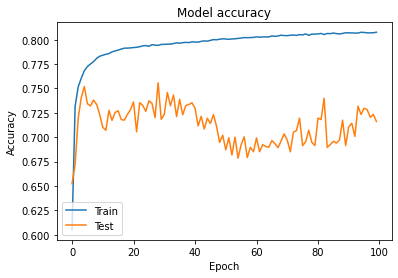

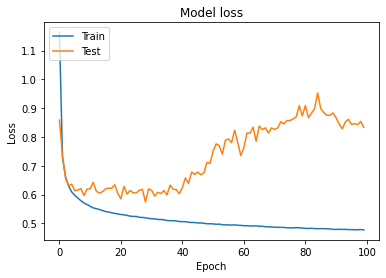

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(Name+'acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(Name+'loss.png')
plt.show()


#pd.DataFrame.from_dict(history2.history).to_csv(Name+'.csv',index=False)
pd.DataFrame.from_dict(history.history).to_csv('attack detection/'+Name+'.csv',index=False)

In [ ]:
model.save('attack detection/'+Name+'.h5')

In [ ]:
!pip install tensorflowjs


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 4.0 MB/s 
     |████████████████████████████████| 40 kB 6.4 MB/s 
     |████████████████████████████████| 180 kB 34.0 MB/s 
     |████████████████████████████████| 145 kB 64.5 MB/s 
     |████████████████████████████████| 217 kB 41.1 MB/s 
     |████████████████████████████████| 51 kB 7.6 MB/s 
     |████████████████████████████████| 76 kB 5.9 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,'attack detection/'+ Name+"tfjsv3")

In [ ]:
model = tf.keras.models.load_model('attack detection/'+Name+'.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model= converter.convert()

In [ ]:
with open('attack detection/model.tflite','wb') as f:
  f.write(tflite_model)